<a href="https://colab.research.google.com/github/reinanbr/colab_notebooks/blob/main/rel_3_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

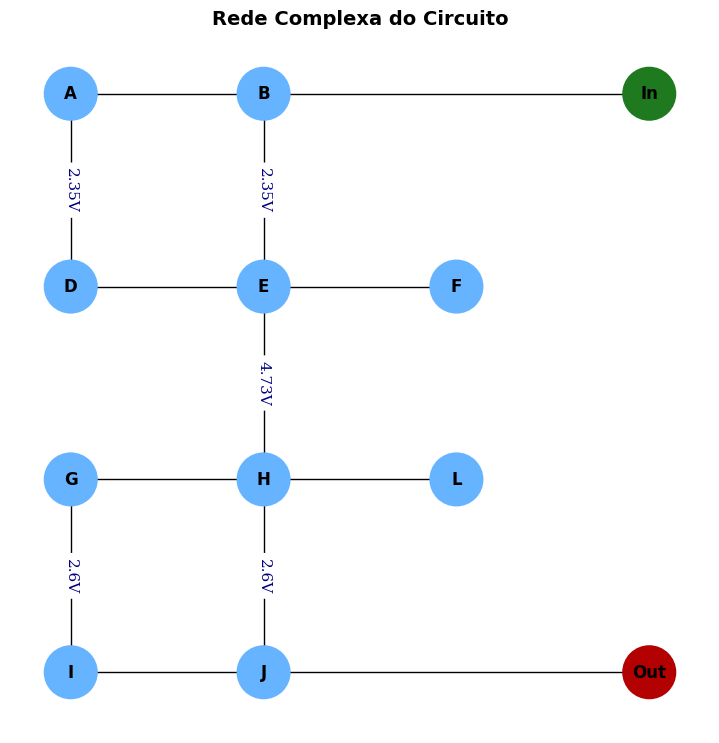

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar grafo do circuito
G = nx.Graph()

# Adicionar nós com coordenadas (posição)
pos = {
    "A": (1, 3),
    "B": (2, 3),
    "In": (4, 3),
    "Out": (4, 0),
    "D": (1, 2),
    "E": (2, 2),
    'F': (3, 2),
    'G': (1, 1),
    'H': (2, 1),
    'L': (3, 1),
    'I': (1, 0),
    'J': (2, 0)
}

G.add_nodes_from(pos.keys())

# Adicionar arestas representando componentes do circuito
G.add_edge("A", "B")
G.add_edge("B", "In")
G.add_edge("B", "E", componente='2.35V')
G.add_edge('D', 'E')
G.add_edge('E', 'F')
G.add_edge("E", "H", componente="4.73V")
G.add_edge("G", "H")
G.add_edge("H", "L")
G.add_edge('A', 'D', componente="2.35V")
G.add_edge('G', 'I', componente='2.6V')
G.add_edge('H', 'J', componente='2.6V')
G.add_edge('I', 'J')
G.add_edge('J', 'Out')

# Criar lista de cores personalizadas
node_colors = []
for node in G.nodes():
    if node == "In":
        node_colors.append("#1f7a1f")  # verde escuro
    elif node == "Out":
        node_colors.append("#b30000")  # vermelho escuro
    else:
        node_colors.append("#66b3ff")  # azul claro

# Plotar circuito com estilo
plt.figure(figsize=(7, 7))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1400,
    node_color=node_colors,
    edge_color="black",
    linewidths=1.5,
    font_size=12,
    font_weight="bold",
    font_color="black",
)

# Colocar rótulos dos componentes (tensões)
edge_labels = nx.get_edge_attributes(G, "componente")
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_size=11,
    font_color="navy",
    font_family="serif",   # simula itálico/mais elegante
)

plt.title("Rede Complexa do Circuito", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()


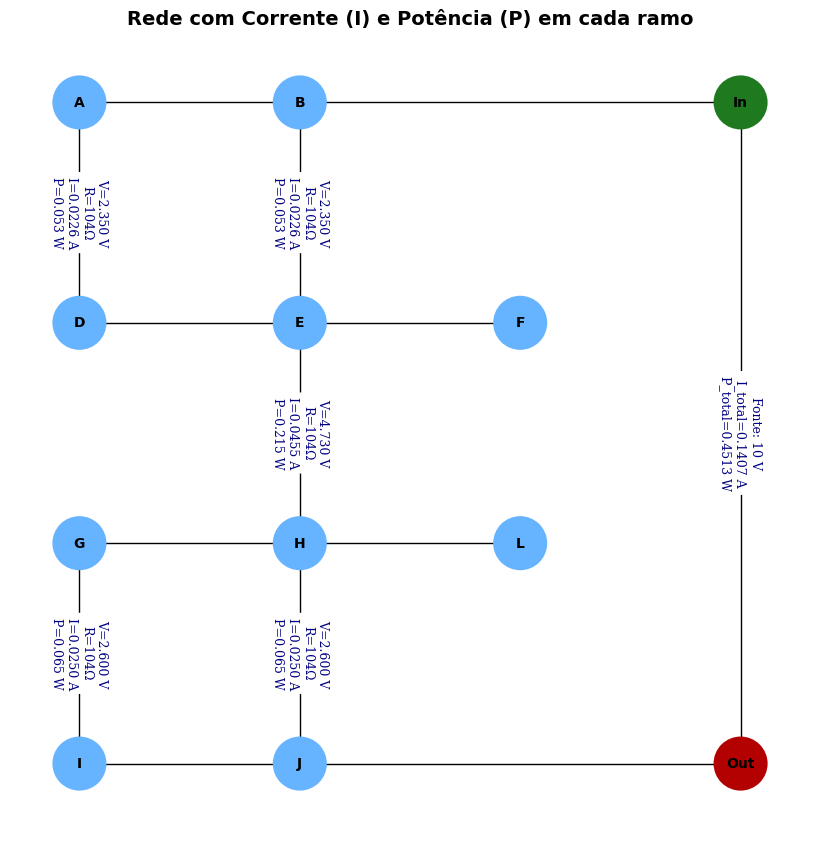

Resistência por ramo: R = 104 Ω
Tensão da fonte: V = 2.6 V
Corrente em cada ramo: I_ramo = 0.09615385 A  (≈ 0.096154 A)
Potência em cada ramo: P_ramo = 0.96153846 W  (≈ 0.961538 W)
Número de ramos paralelos usados: n = 5
Corrente total fornecida pela fonte: I_total = 0.14067308 A  (≈ 0.140673 A)


In [15]:
# Código executado para mostrar a rede com intensidade da corrente em cada componente
import networkx as nx
import matplotlib.pyplot as plt

# Criar grafo da nova rede
G2 = nx.Graph()

# Posições dos nós (mesmo layout)
pos = {
    "A": (1, 3),
    "B": (2, 3),
    "In": (4, 3),
    "Out": (4, 0),
    "D": (1, 2),
    "E": (2, 2),
    'F': (3, 2),
    'G': (1, 1),
    'H': (2, 1),
    'L': (3, 1),
    'I': (1, 0),
    'J': (2, 0)
}
V = 10
G2.add_nodes_from(pos.keys())

# Resistência de cada ramo
R = 104.0  # ohms
V = 10.0   # volts
I_ramo = V / R  # corrente em cada ramo
P_ramo = V * I_ramo  # potência em cada ramo

# Contar ramos (arestas que vamos considerar como resistores entre In e Out)
resistor_edges = [
    ("B", "E"),
    ("E", "H"),
    ("A", "D"),
    ("G", "I"),
    ("H", "J"),
    ("B", "In")  # Opcional: dependendo do seu grafo original, mantive conexões principais; aqui ignoramos arestas sem componente
]

# Arestas normais (sem dissipação)
G2.add_edge("A", "B")
G2.add_edge("B", "In")
G2.add_edge('D', 'E')
G2.add_edge('E', 'F')
G2.add_edge("G", "H")
G2.add_edge("H", "L")
G2.add_edge('I', 'J')
G2.add_edge('J', 'Out')

# Arestas com resistores em paralelo (colocamos corrente e potência)
# Vou colocar os mesmos 6 ramos paralelos que discutimos inicialmente (5 identificados + 1 extra se quiser)
R = 104
Req = 208
I_t = 0
P_t = 0
parallel_edges = [{'net':("B","E"),'V':2.35}, {'net':("E","H"),'V':4.73}, {'net':("A","D"),'V':2.35}, {'net':("G","I"),'V':2.6},{'net':("H","J"),'V':2.6}]
for net in parallel_edges:

    n = net['net']
    V = net['V']
    I = V/R
    P = V*I
    G2.add_edge(n[0], n[1], componente=f"V={V:.3f} V\nR={R:.0f}Ω\nI={I:.4f} A\nP={P:.3f} W")
    I_t+=I
    P_t+=P

# In e Out (com a fonte de 10V aplicada) - corrente total
n = len(parallel_edges)
V_ = 10
Req = 204
I_total = I_t

G2.add_edge("In", "Out", componente=f"Fonte: {V_:.0f} V\nI_total={I_total:.4f} A\nP_total={P_t:.4f} W")

# Preparar rótulos das arestas
edge_labels = nx.get_edge_attributes(G2, "componente")

# Definir cores dos nós
node_colors = []
for node in G2.nodes():
    if node == "In":
        node_colors.append("#1f7a1f")  # verde escuro
    elif node == "Out":
        node_colors.append("#b30000")  # vermelho escuro
    else:
        node_colors.append("#66b3ff")  # azul claro

# Plotar grafo
plt.figure(figsize=(8, 8))
nx.draw(
    G2,
    pos,
    with_labels=True,
    node_size=1400,
    node_color=node_colors,
    edge_color="black",
    linewidths=1.5,
    font_size=10,
    font_weight="bold",
    font_color="black",
)

# Rótulos das arestas com corrente e potência
nx.draw_networkx_edge_labels(
    G2,
    pos,
    edge_labels=edge_labels,
    font_size=9,
    font_color="navy",
    font_family="serif",
)

plt.title("Rede com Corrente (I) e Potência (P) em cada ramo", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

# Imprimir também os valores numéricos claramente
print(f"Resistência por ramo: R = {R:.0f} Ω")
print(f"Tensão da fonte: V = {V:.1f} V")
print(f"Corrente em cada ramo: I_ramo = {I_ramo:.8f} A  (≈ {I_ramo:.6f} A)")
print(f"Potência em cada ramo: P_ramo = {P_ramo:.8f} W  (≈ {P_ramo:.6f} W)")
print(f"Número de ramos paralelos usados: n = {n}")
print(f"Corrente total fornecida pela fonte: I_total = {I_total:.8f} A  (≈ {I_total:.6f} A)")


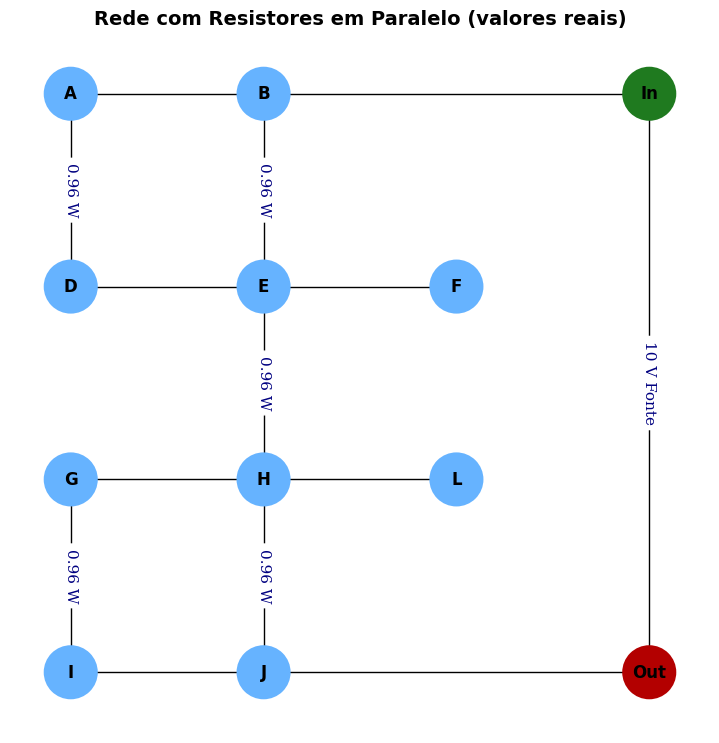

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar grafo da nova rede
G2 = nx.Graph()

# Posições dos nós (mesmo layout)
pos = {
    "A": (1, 3),
    "B": (2, 3),
    "In": (4, 3),
    "Out": (4, 0),
    "D": (1, 2),
    "E": (2, 2),
    'F': (3, 2),
    'G': (1, 1),
    'H': (2, 1),
    'L': (3, 1),
    'I': (1, 0),
    'J': (2, 0)
}

G2.add_nodes_from(pos.keys())

# Resistência de cada ramo
R = 104  # ohms
V = 10   # volts
I_ramo = V / R
P_ramo = V * I_ramo

# Arestas normais (sem dissipação)
G2.add_edge("A", "B")
G2.add_edge("B", "In")
G2.add_edge('D', 'E')
G2.add_edge('E', 'F')
G2.add_edge("G", "H")
G2.add_edge("H", "L")
G2.add_edge('I', 'J')
G2.add_edge('J', 'Out')

# Arestas com resistores em paralelo (colocamos potência)
G2.add_edge("B", "E", componente=f"{P_ramo:.2f} W")
G2.add_edge("E", "H", componente=f"{P_ramo:.2f} W")
G2.add_edge('A', 'D', componente=f"{P_ramo:.2f} W")
G2.add_edge('G', 'I', componente=f"{P_ramo:.2f} W")
G2.add_edge('H', 'J', componente=f"{P_ramo:.2f} W")

# In e Out (com a fonte de 10V aplicada)
G2.add_edge("In", "Out", componente=f"{V} V Fonte")

# Definir cores dos nós
node_colors = []
for node in G2.nodes():
    if node == "In":
        node_colors.append("#1f7a1f")  # verde escuro
    elif node == "Out":
        node_colors.append("#b30000")  # vermelho escuro
    else:
        node_colors.append("#66b3ff")  # azul claro

# Plotar
plt.figure(figsize=(7, 7))
nx.draw(
    G2,
    pos,
    with_labels=True,
    node_size=1400,
    node_color=node_colors,
    edge_color="black",
    linewidths=1.5,
    font_size=12,
    font_weight="bold",
    font_color="black",
)

# Rótulos das arestas
edge_labels = nx.get_edge_attributes(G2, "componente")
nx.draw_networkx_edge_labels(
    G2,
    pos,
    edge_labels=edge_labels,
    font_size=11,
    font_color="navy",
    font_family="serif",
)

plt.title("Rede com Resistores em Paralelo (valores reais)", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()


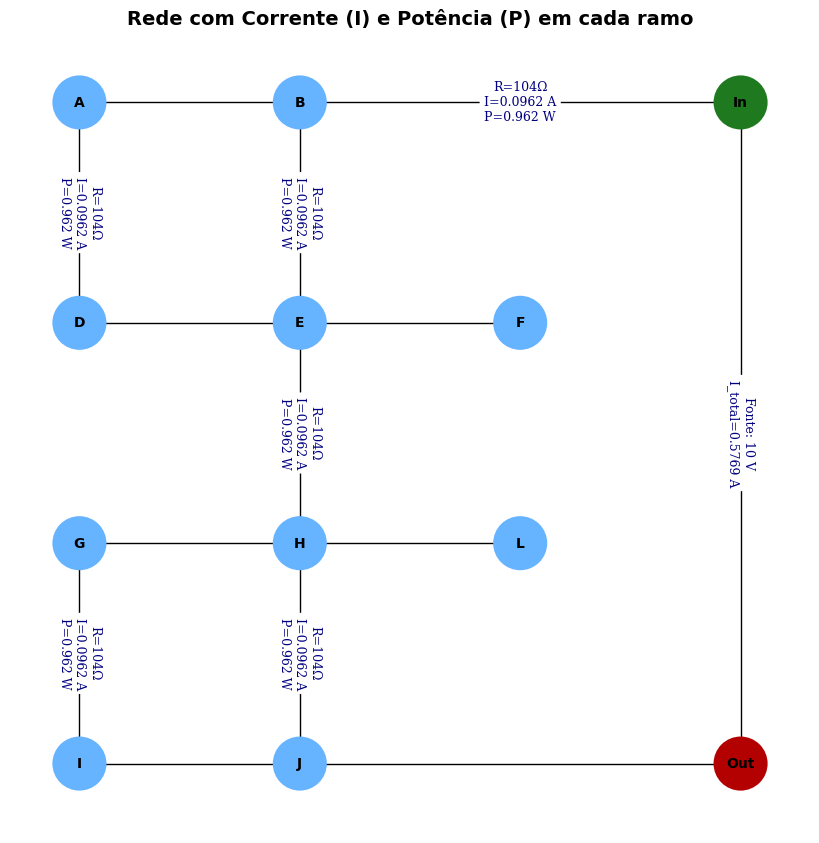

Resistência por ramo: R = 104 Ω
Tensão da fonte: V = 10.0 V
Corrente em cada ramo: I_ramo = 0.09615385 A  (≈ 0.096154 A)
Potência em cada ramo: P_ramo = 0.96153846 W  (≈ 0.961538 W)
Número de ramos paralelos usados: n = 6
Corrente total fornecida pela fonte: I_total = 0.57692308 A  (≈ 0.576923 A)


In [1]:
# Código executado para mostrar a rede com intensidade da corrente em cada componente
import networkx as nx
import matplotlib.pyplot as plt

# Criar grafo da nova rede
G2 = nx.Graph()

# Posições dos nós (mesmo layout)
pos = {
    "A": (1, 3),
    "B": (2, 3),
    "In": (4, 3),
    "Out": (4, 0),
    "D": (1, 2),
    "E": (2, 2),
    'F': (3, 2),
    'G': (1, 1),
    'H': (2, 1),
    'L': (3, 1),
    'I': (1, 0),
    'J': (2, 0)
}
V = 10
G2.add_nodes_from(pos.keys())

# Resistência de cada ramo
R = 104.0  # ohms
V = 10.0   # volts
I_ramo = V / R  # corrente em cada ramo
P_ramo = V * I_ramo  # potência em cada ramo

# Contar ramos (arestas que vamos considerar como resistores entre In e Out)
resistor_edges = [
    ("B", "E"),
    ("E", "H"),
    ("A", "D"),
    ("G", "I"),
    ("H", "J"),
    ("B", "In")  # Opcional: dependendo do seu grafo original, mantive conexões principais; aqui ignoramos arestas sem componente
]

# Arestas normais (sem dissipação)
G2.add_edge("A", "B")
G2.add_edge("B", "In")
G2.add_edge('D', 'E')
G2.add_edge('E', 'F')
G2.add_edge("G", "H")
G2.add_edge("H", "L")
G2.add_edge('I', 'J')
G2.add_edge('J', 'Out')

# Arestas com resistores em paralelo (colocamos corrente e potência)
# Vou colocar os mesmos 6 ramos paralelos que discutimos inicialmente (5 identificados + 1 extra se quiser)
R = 104
Req = 208
parallel_edges = [{'net':("B","E"),'V':2.35}, {'net':("E","H"),'V':0.96}, {'net':("A","D"),'V':0.96}, {'net':("G","I"),'V':0.96},{'net': ("H","J"),'V':0.96}, {'net':("B","In"),'V':10}]
for net in parallel_edges:

    n = net['net']
    V = net['V']
    I = V/R
    P = V*I
    G2.add_edge(n[0], n[1], componente=f"R={R:.0f}Ω\nI={I_ramo:.4f} A\nP={P_ramo:.3f} W")

# In e Out (com a fonte de 10V aplicada) - corrente total
n = len(parallel_edges)
I_total = n * I_ramo

G2.add_edge("In", "Out", componente=f"Fonte: {V:.0f} V\nI_total={I_total:.4f} A")

# Preparar rótulos das arestas
edge_labels = nx.get_edge_attributes(G2, "componente")

# Definir cores dos nós
node_colors = []
for node in G2.nodes():
    if node == "In":
        node_colors.append("#1f7a1f")  # verde escuro
    elif node == "Out":
        node_colors.append("#b30000")  # vermelho escuro
    else:
        node_colors.append("#66b3ff")  # azul claro

# Plotar grafo
plt.figure(figsize=(8, 8))
nx.draw(
    G2,
    pos,
    with_labels=True,
    node_size=1400,
    node_color=node_colors,
    edge_color="black",
    linewidths=1.5,
    font_size=10,
    font_weight="bold",
    font_color="black",
)

# Rótulos das arestas com corrente e potência
nx.draw_networkx_edge_labels(
    G2,
    pos,
    edge_labels=edge_labels,
    font_size=9,
    font_color="navy",
    font_family="serif",
)

plt.title("Rede com Corrente (I) e Potência (P) em cada ramo", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

# Imprimir também os valores numéricos claramente
print(f"Resistência por ramo: R = {R:.0f} Ω")
print(f"Tensão da fonte: V = {V:.1f} V")
print(f"Corrente em cada ramo: I_ramo = {I_ramo:.8f} A  (≈ {I_ramo:.6f} A)")
print(f"Potência em cada ramo: P_ramo = {P_ramo:.8f} W  (≈ {P_ramo:.6f} W)")
print(f"Número de ramos paralelos usados: n = {n}")
print(f"Corrente total fornecida pela fonte: I_total = {I_total:.8f} A  (≈ {I_total:.6f} A)")
